In [2]:
from pyspark import  SparkContext
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD,RidgeRegressionWithSGD, LassoWithSGD
from numpy import array

sc = SparkContext("local[4]",appName="RegressionSong")

In [3]:
data = sc.textFile("D://NEU - Big Data and Intelligent Analytics/Midterm/YearPredictionMSD.txt")

In [4]:
#def parsePoint(line):
 #   values = [float(x) for x in line.replace(';', ' ').split(' ')]
  #  return LabeledPoint(values[0], values[1:])

def line_to_fields(line):
    space_separated_line = line.replace(',', ' ')
    string_array = space_separated_line.split(' ')
    float_array = map(float, string_array)
    return LabeledPoint(float_array[0], float_array[1:])

In [5]:
parsedData = data.map(line_to_fields)

Populating the interactive namespace from numpy and matplotlib


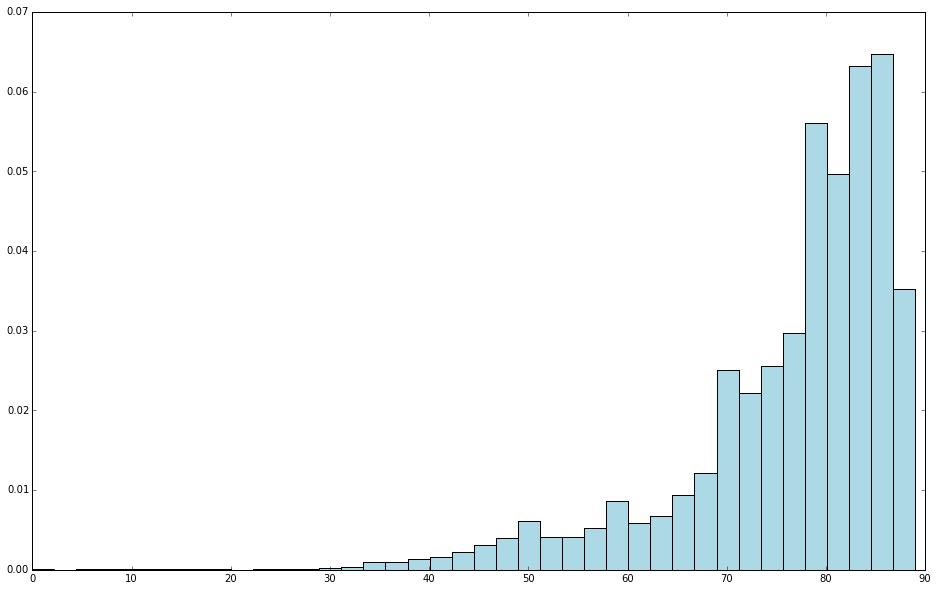

In [6]:
parsedData1 = parsedData.map(lambda x: LabeledPoint((x.label-1922.0),x.features))

In [8]:
#parsedData1.cache().take(2)

[LabeledPoint(79.0, [49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.0896,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.7267,1.3679,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.5798,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.5506,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.5911,-8.30657,7.93706,-10.7366,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.1245,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327]),
 LabeledPoint(79.0, [48.73215,18.4293,70.32679,12.94636,-10.32437,-24.83777,8.7663,-0.92019,18.76548,4.5921,2.2192,0.34006,44.38997,2056.93836,6

In [7]:
from pyspark.mllib.util import MLUtils
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.feature import StandardScaler

label1 = parsedData1.map(lambda x: x.label)
features1 = parsedData1.map(lambda x: x.features)

scaler2 = StandardScaler(withMean=True, withStd=True).fit(features1)
data2 = label1.zip(scaler2.transform(features1.map(lambda x: Vectors.dense(x.toArray()))))

In [79]:
#data2.take(3)

[(79.0,
  DenseVector([1.0806, 0.3913, 1.8265, 0.4647, -0.4747, -0.2782, -1.5524, -1.3108, 0.3877, -0.6662, 0.7934, -0.5843, -1.0561, -1.0451, -0.8059, -0.7474, -1.0553, -0.8588, -0.8731, -0.9034, -0.666, -0.8362, -1.008, -0.7348, -0.4237, -0.5046, 0.2612, 0.347, -0.6778, -0.4639, -0.0319, 0.1447, 0.0299, 0.1036, 0.1717, -0.6767, -0.1981, -0.4437, 0.5854, 0.2428, -0.3011, -0.1776, 0.3768, -0.429, 0.4195, -0.4536, 0.0073, 0.3731, 0.3638, 0.0519, -0.3395, -0.4291, 0.0074, 0.4785, 0.0509, -0.3108, 0.0022, 0.2411, -0.0745, -0.1152, -0.1953, 0.1551, -0.2723, 0.1388, -0.3661, -0.2796, 0.0154, 0.3712, -0.0351, 0.1863, -0.1121, -0.2007, 0.1156, 0.3024, 0.2005, -0.0126, 0.0409, -0.1139, 0.2518, 0.1065, -0.0853, 0.1085, 0.1428, -0.2374, 0.0492, -0.3562, 0.5445, -0.4706, -0.256, 0.0423])),
 (79.0,
  DenseVector([0.8809, 0.3323, 1.7485, 0.7218, -0.1649, -1.1912, 0.7657, 0.1096, 1.4209, 0.4149, 0.5413, -0.2651, 0.4796, -0.2186, -1.0799, -0.9676, -0.2813, -0.8035, 0.4496, -0.4885, -0.3557, -0.3178, 

In [8]:
import numpy as np

In [9]:
x = np.array(data2)

In [10]:
x = data2.map(lambda x: x[0])
y = data2.map(lambda x: x[1])

In [97]:
#x.take(10)

[79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 85.0]

In [99]:
#y.take(10)

[DenseVector([1.0806, 0.3913, 1.8265, 0.4647, -0.4747, -0.2782, -1.5524, -1.3108, 0.3877, -0.6662, 0.7934, -0.5843, -1.0561, -1.0451, -0.8059, -0.7474, -1.0553, -0.8588, -0.8731, -0.9034, -0.666, -0.8362, -1.008, -0.7348, -0.4237, -0.5046, 0.2612, 0.347, -0.6778, -0.4639, -0.0319, 0.1447, 0.0299, 0.1036, 0.1717, -0.6767, -0.1981, -0.4437, 0.5854, 0.2428, -0.3011, -0.1776, 0.3768, -0.429, 0.4195, -0.4536, 0.0073, 0.3731, 0.3638, 0.0519, -0.3395, -0.4291, 0.0074, 0.4785, 0.0509, -0.3108, 0.0022, 0.2411, -0.0745, -0.1152, -0.1953, 0.1551, -0.2723, 0.1388, -0.3661, -0.2796, 0.0154, 0.3712, -0.0351, 0.1863, -0.1121, -0.2007, 0.1156, 0.3024, 0.2005, -0.0126, 0.0409, -0.1139, 0.2518, 0.1065, -0.0853, 0.1085, 0.1428, -0.2374, 0.0492, -0.3562, 0.5445, -0.4706, -0.256, 0.0423]),
 DenseVector([0.8809, 0.3323, 1.7485, 0.7218, -0.1649, -1.1912, 0.7657, 0.1096, 1.4209, 0.4149, 0.5413, -0.2651, 0.4796, -0.2186, -1.0799, -0.9676, -0.2813, -0.8035, 0.4496, -0.4885, -0.3557, -0.3178, -0.7869, 0.1654, -0

In [11]:
z = data2.map(lambda x: LabeledPoint((x[0]),(x[1])))

In [102]:
#z.take(5)

[LabeledPoint(79.0, [1.08057377316,0.391264996808,1.82653069582,0.464656201175,-0.474729065539,-0.27820375998,-1.55236943893,-1.31084387662,0.387703700803,-0.666165473994,0.793412835905,-0.584274317188,-1.05610214927,-1.04509203865,-0.805911104931,-0.747366783253,-1.05526137749,-0.85884348572,-0.873143104205,-0.903354640393,-0.666023749484,-0.836211081443,-1.00801150345,-0.734828348949,-0.423682461832,-0.504618423386,0.261179894468,0.347006922602,-0.677762374514,-0.463918860977,-0.0319104491972,0.144688496533,0.0299399736167,0.103644673776,0.171685040933,-0.676678977752,-0.198143413458,-0.443720880709,0.585405506527,0.242785494543,-0.301117989272,-0.177615839455,0.37683783513,-0.429024815925,0.41945592358,-0.453645083454,0.00733612871386,0.373072032058,0.363772533122,0.0519309822825,-0.339481079674,-0.429075449479,0.00743534710677,0.478515453115,0.0509013796305,-0.310816076741,0.00220609763197,0.241121827383,-0.0744843506963,-0.1152190814,-0.195270894031,0.155138511994,-0.272266941778,

In [12]:
#Spliting data into training and test data
(trainingData, testData) = z.randomSplit([0.7, 0.3])


In [13]:
# Build the model
model_linear = LinearRegressionWithSGD.train(trainingData, iterations=100, step=1, intercept= True,regType='l1' )

In [14]:
# Evaluate the model on training data
valuesAndPreds =  trainingData.map(lambda p: (p.label, model_linear.predict(p.features)))

In [13]:
# Evaluate the model on test data
valuesAndPreds1 =  testData.map(lambda p: (p.label, model_linear.predict(p.features)))

In [15]:
MSE = valuesAndPreds.map(lambda (v, p): (v - p)**2).reduce(lambda x, y: x + y) / valuesAndPreds.count()
print("Root Mean Squared Error for training = " + str(MSE**0.5))

Root Mean Squared Error for training = 9.54828615654


In [132]:
model_linear.weights

DenseVector([3.899, -1.9016, -1.1747, -0.5175, -0.1365, -1.9635, 0.2618, -0.561, -0.4586, 0.125, -0.1365, -0.3006, 0.7216, 0.527, -0.4192, 0.6498, 0.2432, 0.5249, 0.4778, 0.6851, 0.1231, 0.0881, 0.9543, 0.2801, -0.1554, 0.0166, 0.6071, 0.075, 0.1378, -0.042, -0.2072, -0.094, -0.3599, 0.1315, 0.0364, -0.4899, -0.0813, 0.3043, 0.4145, -0.3232, -0.3578, -0.1001, -0.1354, -0.068, -0.1105, 0.2107, 0.2349, -0.3893, -0.0324, 0.1416, 0.0414, -0.0775, 0.0891, -0.0017, -0.0102, 0.0103, -0.4495, 0.4592, -0.2561, -0.0967, -0.1721, -0.1013, -0.3813, 0.2759, -0.3192, 0.0392, -0.0083, 0.0132, -0.3916, -0.092, -0.2342, 0.0258, 0.2275, 0.2784, 0.1821, 0.2156, -0.0245, -0.5664, -0.0652, -0.022, -0.0155, -0.0078, 0.2686, 0.1581, 0.4066, -0.1319, 0.1709, -0.3382, -0.1839, -0.0735])

In [14]:
MSE1 = valuesAndPreds1.map(lambda (v, p): (v - p)**2).reduce(lambda x, y: x + y) / valuesAndPreds1.count()
print("Root Mean Squared Error for test = " + str(MSE1**0.5))

Root Mean Squared Error for test = 9.55074158276


In [15]:
#Build Ridge model
model_ridge = RidgeRegressionWithSGD.train(trainingData,iterations=100,step=1,intercept= True)

In [75]:
# Evaluate the model on training data
valuesAndPreds =  trainingData.map(lambda p: (p.label, model_ridge.predict(p.features)))


In [16]:
# Evaluate the model on test data
valuesAndPreds1 =  testData.map(lambda p: (p.label, model_ridge.predict(p.features)))

In [76]:
MSE = valuesAndPreds.map(lambda (v, p): (v - p)**2).reduce(lambda x, y: x + y) / valuesAndPreds.count()

print("Root Mean Squared Error for training = " + str(MSE**0.5))


Root Mean Squared Error for training = 28.1051499125
Root Mean Squared Error for test = 28.0518969497


In [17]:
MSE1 = valuesAndPreds1.map(lambda (v, p): (v - p)**2).reduce(lambda x, y: x + y) / valuesAndPreds1.count()
print("Root Mean Squared Error for test = " + str(MSE1**0.5))

Root Mean Squared Error for test = 9.58223807257


In [26]:
model_ridge.weights

DenseVector([5.0363, -2.649, -1.3531, -0.3534, -0.2726, -2.4985, 0.1189, -0.7667, -0.6653, 0.2195, -0.3942, -0.1443, 0.9669, 0.5969, -0.5495, 0.7246, 0.2253, 0.7889, 0.5879, 0.744, 0.1271, -0.0306, 1.2867, 0.4356, -0.3463, 0.043, 0.7871, 0.0873, 0.1374, -0.0298, -0.1419, -0.1027, -0.406, 0.1154, 0.0468, -0.5692, -0.0785, 0.3449, 0.4074, -0.3486, -0.2746, -0.0953, -0.1216, -0.0843, -0.1517, 0.3295, 0.2359, -0.4694, 0.0266, 0.2314, 0.0345, -0.1252, 0.1405, 0.0253, -0.0189, 0.0171, -0.5594, 0.5501, -0.2055, -0.023, -0.1917, -0.0954, -0.2749, 0.3487, -0.4371, 0.0723, -0.0212, -0.0416, -0.4389, -0.1477, -0.2596, 0.0541, 0.1892, 0.2667, 0.1748, 0.3571, 0.0276, -0.6137, -0.0285, -0.0377, 0.0, -0.0777, 0.2388, 0.1065, 0.4173, -0.0343, 0.1798, -0.3746, -0.2128, -0.0616])

In [22]:
#Build Lasso Model
model_lasso = LassoWithSGD.train(trainingData,iterations=100,step=1)

In [ ]:
# Evaluate the model on training data
valuesAndPreds =  trainingData.map(lambda p: (p.label, model_lasso.predict(p.features)))


In [23]:
# Evaluate the model on test data
valuesAndPreds1 =  testData.map(lambda p: (p.label, model_lasso.predict(p.features)))

In [ ]:
MSE = valuesAndPreds.map(lambda (v, p): (v - p)**2).reduce(lambda x, y: x + y) / valuesAndPreds.count()

print("Root Mean Squared Error for training = " + str(MSE**0.5))


In [24]:
MSE1 = valuesAndPreds1.map(lambda (v, p): (v - p)**2).reduce(lambda x, y: x + y) / valuesAndPreds1.count()
print("Root Mean Squared Error for test = " + str(MSE1**0.5))

Root Mean Squared Error for test = 77.0180333548


In [25]:
model_lasso.weights

DenseVector([2.2924, -0.9132, -0.8314, -0.5448, -0.0308, -1.5845, 0.4688, -0.3592, -0.3414, 0.1453, 0.078, -0.4516, 0.4091, 0.4535, -0.2061, 0.3888, 0.3623, 0.1184, 0.3621, 0.6924, 0.0319, 0.3137, 0.5041, 0.0413, 0.1545, -0.1575, 0.2683, 0.0577, 0.0821, -0.0123, -0.1653, -0.0787, -0.3563, 0.1543, -0.0746, -0.3992, -0.0389, 0.2938, 0.4154, -0.2868, -0.5671, -0.0389, -0.2042, 0.0505, -0.0206, 0.0762, 0.1803, -0.1745, -0.1041, 0.1703, 0.0708, -0.0751, 0.1039, -0.0569, -0.0, 0.0183, -0.4509, 0.3386, -0.169, -0.2495, -0.075, -0.203, -0.4897, 0.228, -0.1874, 0.1673, -0.0234, 0.1639, -0.3689, -0.0051, -0.1851, -0.1182, 0.2673, 0.3604, 0.1909, 0.0107, -0.1816, -0.4435, -0.1375, -0.0443, 0.0383, 0.1084, 0.3313, 0.1593, 0.3796, -0.2765, 0.0006, -0.2671, -0.167, -0.1011])

In [7]:
sc.stop()